# Travail mathématique préparatoire aux réseaux neuronaux

## Calcul matriciel

### Addition de matrices
Faire les opérations suivantes sur le papier en premier, puis vérifiez vos résultats en programmant l'opération matricielle en utilisant numpy.

$$\begin{bmatrix}1 & 2 \\3 & 4 \end{bmatrix} + \begin{bmatrix}1 & 1 \\1 & 1 \end{bmatrix} = \begin{bmatrix}2 & 3 \\4 & 5 \end{bmatrix} $$

$$\begin{bmatrix}1 & 1 \\1 & 1 \end{bmatrix} +\begin{bmatrix}1 & 0 \\0& 1 \end{bmatrix} = \begin{bmatrix}2 & 1 \\1 & 2 \end{bmatrix}$$

$$\begin{bmatrix}1 & 2 \\3 & 4 \end{bmatrix}+\begin{bmatrix}0 & 0 \\0 & 0 \end{bmatrix} = \begin{bmatrix}1 & 2 \\3 & 4 \end{bmatrix}$$

$$\begin{bmatrix}1 & 2 \\10 & 20 \end{bmatrix} + \begin{bmatrix}0\\ 1 \end{bmatrix} =  $$ Addition non définie car les tailles ne correspondent pas

$$\begin{bmatrix}1 & 0 & 1 & 0 \\1 & 0 & 1 & 0 \end{bmatrix}  .\begin{bmatrix}1 & 1 & 1  \\ 2 & 2 & 1 \\ 3 & 3 & 3 \\ 4 & 4 & 4 \end{bmatrix} = $$ Addition non définie car les tailles ne correspondent pas

### Multiplication de matrices
Faire les opérations suivantes sur le papier en premier, puis vérifiez vos résultats en programmant l'opération matricielle en utilisant numpy.

$$\begin{bmatrix}1 & 2 \\3 & 4 \end{bmatrix} . \begin{bmatrix}1 & 1 \\1 & 1 \end{bmatrix} = \begin{bmatrix}3 & 3 \\7 & 7 \end{bmatrix} $$

$$\begin{bmatrix}1 & 1 \\1 & 1 \end{bmatrix} . \begin{bmatrix}1 & 0 \\0& 1 \end{bmatrix} = \begin{bmatrix}1 & 1 \\1 & 1 \end{bmatrix}$$

$$\begin{bmatrix}1 & 2 \\3 & 4 \end{bmatrix} . \begin{bmatrix}0 & 0 \\0 & 0 \end{bmatrix} = \begin{bmatrix}0 & 0 \\0 & 0 \end{bmatrix}$$

$$\begin{bmatrix}1 & 1 \\1 & 1 \end{bmatrix} .\begin{bmatrix}0& 1 \end{bmatrix} = $$
non définie car les tailles ne correspondent pas (2, 2) * (1, 2)

$$\begin{bmatrix}1 & 2 \\10 & 20 \end{bmatrix} .\begin{bmatrix}0\\ 1 \end{bmatrix} = \begin{bmatrix}2\\ 20 \end{bmatrix}$$

$$\begin{bmatrix}1 & 0 & 1 & 0 \\0 & 1 & 0 & 1\end{bmatrix}  .\begin{bmatrix}1 & 1 & 1  \\ 2 & 2 & 1 \\ 3 & 3 & 3 \\ 4 & 4 & 4 \end{bmatrix} = \begin{bmatrix}4 & 4 & 4  \\ 6 & 6 & 6 \end{bmatrix} $$
$$(2,4) . (4,3) \Rightarrow (2, 3)$$

## Descente de gradient
Trouver un minimum d'une fonction f définie par

$$f(x)=x^2-2*x+3$$

La dérivé de $f$ est la fonction $f'$ définie par:
$$ f'(x) = 2*x -2 $$

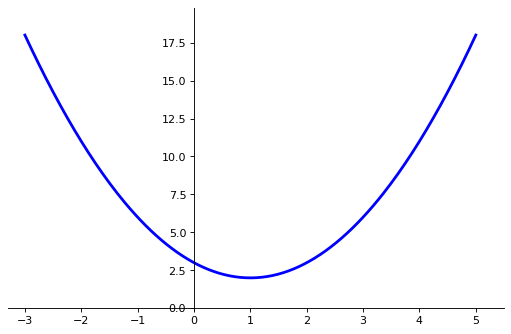

In [10]:
from pylab import *
import numpy as np

figure(figsize=(8,5), dpi=80)
subplot(111)

X = np.linspace(-3, 5, 256,endpoint=True)
C = np.power(X,2)-2*X+3
plot(X, C, color="blue", linewidth=2.5, linestyle="-")

ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

xlim(X.min()*1.1, X.max()*1.1)
ylim(-0.1,C.max()*1.1)

show()

Le but de cet exercice et de retrouver le minimum de la fonction f en utilisant l'algorithme de descente de gradient. On connaît déjà ce minimum en calculant la valeur de x pour laquelle $$ f'(x) = 0$$

### Mininum

Calculer la valeur de x donnant le minimum de $f$ grâce à $f'$.

$$ f'(x) = 0$$
$$\Leftrightarrow 2*x - 2 = 0$$
$$\Leftrightarrow 2*x = 2$$
$$\Leftrightarrow x = 1$$

### Simple initialisation

Coder l'algorithme en utilisant comme point de départ $x_{init} = -2$ 

In [14]:
def f(x):
    return x*x-2*x+3

def grad_f(x):
    return 2*x-2

# taux d'apprentisssasge = learning rate
eta = 0.1
# marge d'erreur
epsilon = 0.00001

x_init = -2
minimum = False
while not minimum:
    x_final = x_init - eta * grad_f(x_init)
    if abs(f(x_final)-f(x_init)) < epsilon :
        minimum = True
    else:
        x_init = x_final

print('Minimum trouvé:', x_init)

Minimum trouvé: 0.9953577248526797


### Initialisation multiple

Faire le test avec un batch de plusieurs points initiaux utilisés simultanément: `[-2, -1, 5]` . Est ce que ça fonctionne encore?

In [19]:
import numpy as np
np.mean([-2, -1, 5])

0.6666666666666666

In [22]:
x_init = [-2, -1, 5]
x_final = [0, 0, 0]
n = len(x_init)
minimum = False
while not minimum:
    for i in range(n):
        x_final[i] = x_init[i] - eta * grad_f(x_init[i])
        mean_distance = 0
        mean_distance += abs(f(x_final[i])-f(x_init[i]))
    if abs(f(x_final[i])-f(x_init[i])) < epsilon :
        minimum = True
    else:
        x_init = x_final.copy()

print('Minimum trouvé:', np.mean(x_init))
print('liste des points en cours:', x_init)

Minimum trouvé: 0.9995873533202381
liste des points en cours: [0.9962861798821437, 0.9975241199214293, 1.0049517601571414]
